In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use(['dark_background', 'presentation'])

<IPython.core.display.Javascript object>


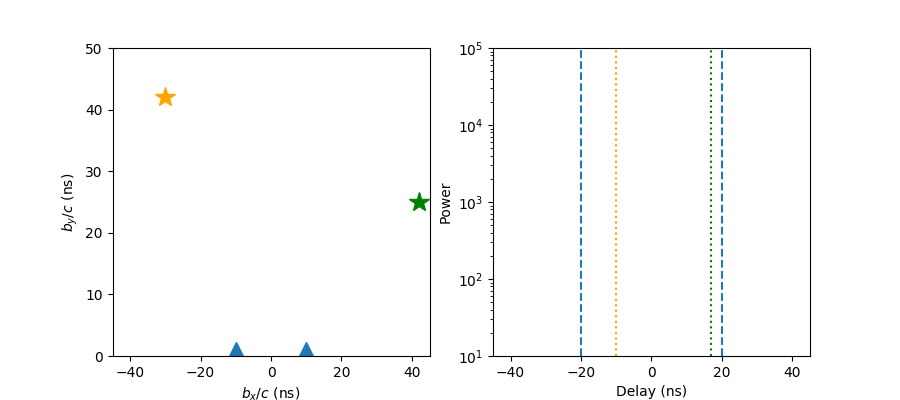

In [2]:
fig0, ax0 = plt.subplots(1,2,figsize=(9,4))

bx = np.linspace(-45, 45, num=1000)
bz = np.linspace(0,50, num=1000)

ax0[0].set_xlabel(r'$b_x/c$ (ns)')
ax0[0].set_ylabel(r'$b_y/c$ (ns)')
ax0[0].plot([-10,10],[0,0],'^',markersize=20)
ax0[0].plot(42,25,'*',color='g',markersize=15)
ax0[0].plot(-30, 42, '*', color='orange', markersize=15)
ax0[0].set_ylim(0,50)
ax0[0].set_xlim(-45,45)

ax0[1].set_xlabel('Delay (ns)')
ax0[1].set_ylabel('Power')
ax0[1].set_xlim(-45,45)
ax0[1].set_ylim(10, 1e5)
ax0[1].set_yscale('log')
ax0[1].axvline(x=-20,linestyle='--')
ax0[1].axvline(x=20,linestyle='--')
ax0[1].axvline(x=-10,color='orange',linestyle=':')
ax0[1].axvline(x=17,color='green',linestyle=':')
#fig0.savefig('delay_geometric.png', edgecolor='none', bbox_inches='tight')

# Foregrounds

The foregrounds are synchrotron power spectra which are smooth in frequency.

<IPython.core.display.Javascript object>


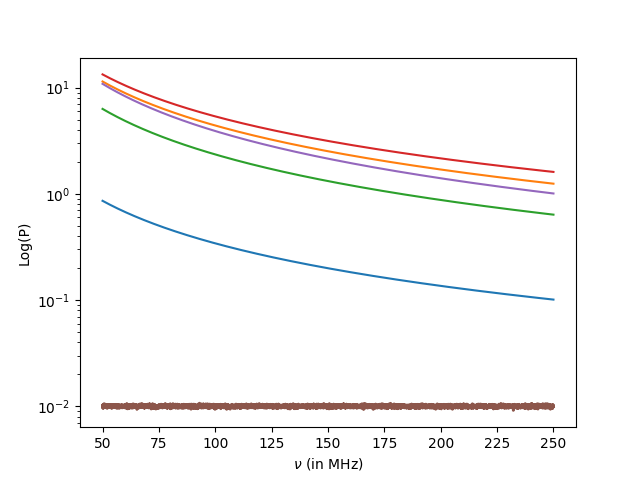

Text(0,0.5,u'Log(P)')

In [66]:
fqs = np.linspace(50, 250, num=8192)*1e6
spectral_indices = np.random.uniform(low=2.3, high=2.5, size=5)
EoR = np.random.normal(loc=0.1, scale=1e-3, size=len(fqs))**2

fig1, ax1 = plt.subplots(1,1)

fgnds = []
for a in spectral_indices:
    e = fqs**(1-a)/2
    fgnds.append(np.random.random()*15*e/np.max(e))

ax1.semilogy(fqs/1e6, np.transpose(fgnds))
ax1.semilogy(fqs/1e6, EoR, linewidth=2)
ax1.set_xlabel(r'$\nu$ (in MHz)')
ax1.set_ylabel(r'Log(P)')
#fig.savefig('foreground_spectra.png', edgecolor='k', bbox_inches='tight')

<IPython.core.display.Javascript object>


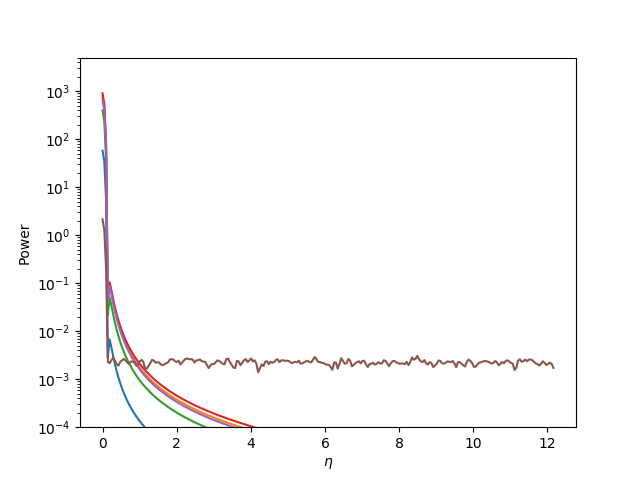

Text(0,0.5,u'Power')

In [70]:
fig2, ax2 = plt.subplots(1,1)

wsize = 512

eta  = np.fft.fftfreq(wsize, d=1/(fqs[1]-fqs[0]))*1e-3
bh_window = np.blackman(wsize)

FEoR = np.mean(np.abs(np.fft.fft(EoR.reshape(-1, wsize)*bh_window, axis=1)), axis=0)

Fgnds = []
for f in fgnds:
    F = np.mean(np.abs(np.fft.fft(f.reshape(-1, wsize)*bh_window, axis=1)), axis=0)
    Fgnds.append(F)
    ax2.semilogy(eta[:wsize/2], np.abs(F[:wsize/2]),'-')
    
ax2.semilogy(eta[:wsize/2], np.abs(FEoR[:wsize/2]),'-')
ax2.set_ylim(1e-4,5e3)
ax2.set_xlabel(r'$\eta$')
ax2.set_ylabel('Power')

<IPython.core.display.Javascript object>


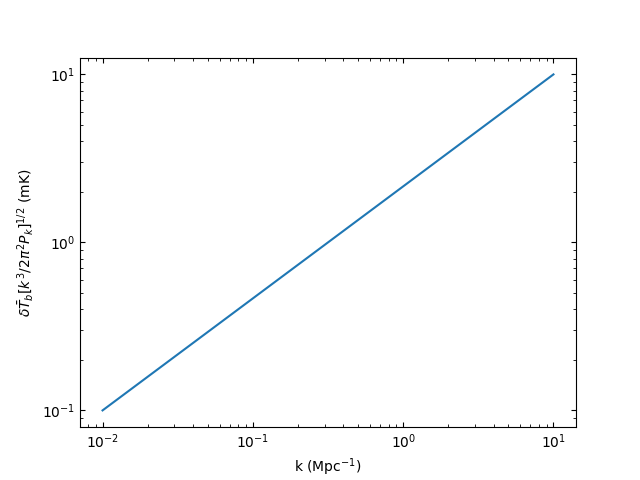

In [69]:
k = np.logspace(-2, 1, num=8192)
Pk = np.logspace(-1, 1, num=8192)

fig3, ax3 = plt.subplots(1,1)
ax3.tick_params(which='both', direction='in', top=True, right=True)
ax3.set_xlabel(r'k (Mpc$^{-1}$)')
ax3.set_ylabel(r'$\bar{\delta T_b} \left[k^3/2\pi^2 P_{k}\right]^{1/2}$ (mK)')
ax3.loglog(k, Pk)

fig3.savefig('reion_powerspec.png', edgecolor='k', bbox_inches='tight')

<IPython.core.display.Javascript object>


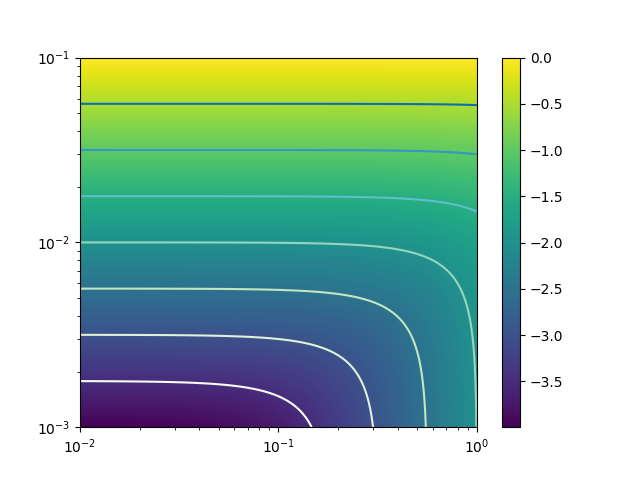

In [82]:
kpara = np.logspace(-2, 0, num=1024)
kperp = np.logspace(-3, -1, num=1024)

Pk = np.zeros((1024,1024))

for i in range(1024):
    for j in range(1024):
        Pk[i][j] = kpara[i]**2 + kperp[j]**2
        
fig4, ax4 = plt.subplots(1,1)
pcm = ax4.pcolormesh(kpara, kperp, np.log10(Pk))
ax4.contour(kpara, kperp, np.log10(Pk),cmap='GnBu')
fig4.colorbar(pcm)